# Breast Cancer Diagnostic

## Import libraries and loading data

In [135]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from google.colab import drive

In [136]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/breast_cancer/data.csv', sep=',', encoding='iso-8859-1')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Analysis & Exploration

Removing the columns id and a weird last column

In [137]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Checking the data types

In [138]:
data.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


Checking Missing values

In [139]:
# there's no missing values
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


### Distribution

<Axes: xlabel='concavity_mean', ylabel='Count'>

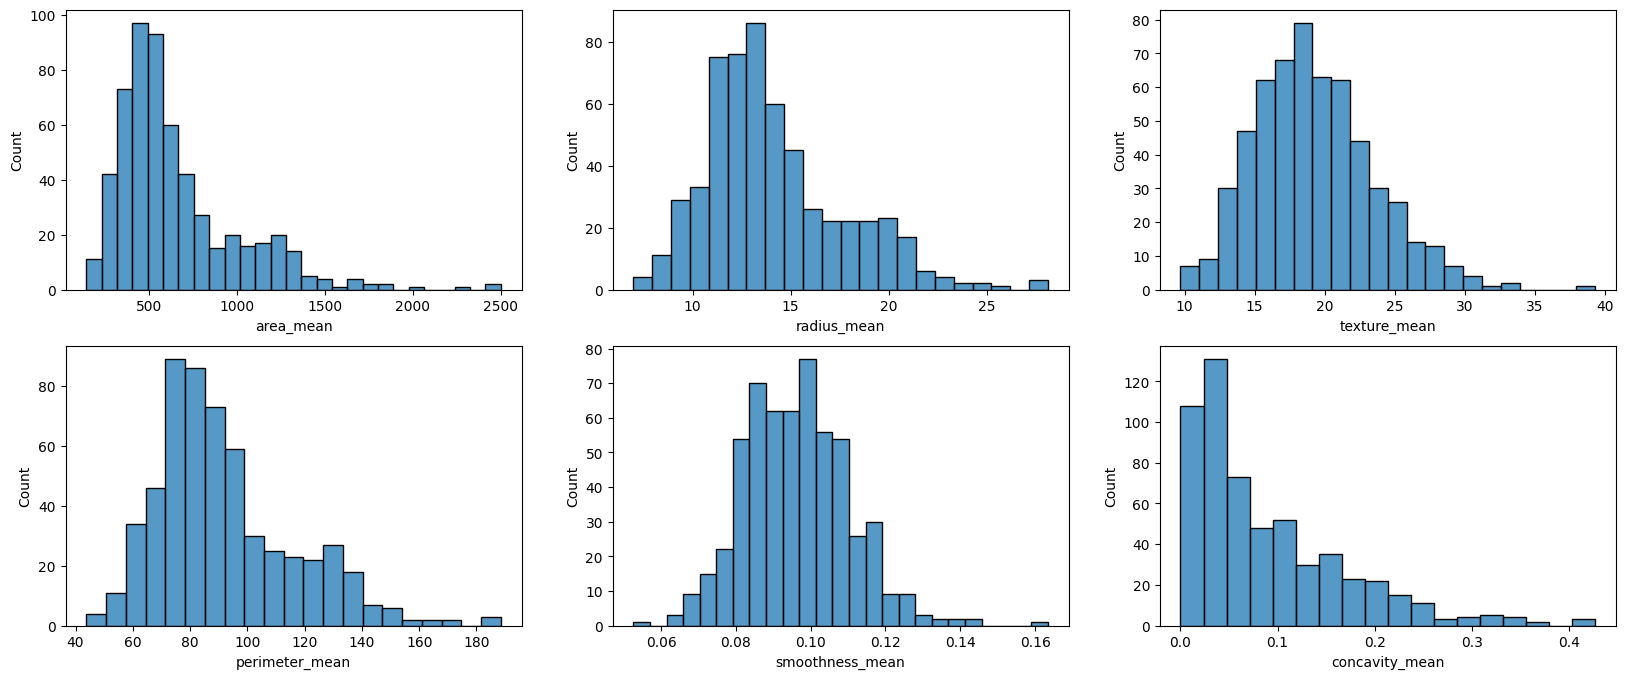

In [140]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sb.histplot(data['area_mean'], ax = axes[0, 0])
sb.histplot(data['radius_mean'], ax = axes[0, 1])
sb.histplot(data['texture_mean'], ax = axes[0, 2])
sb.histplot(data['perimeter_mean'], ax = axes[1, 0])
sb.histplot(data['smoothness_mean'], ax = axes[1, 1])
sb.histplot(data['concavity_mean'], ax = axes[1, 2])

### Variables Correlation

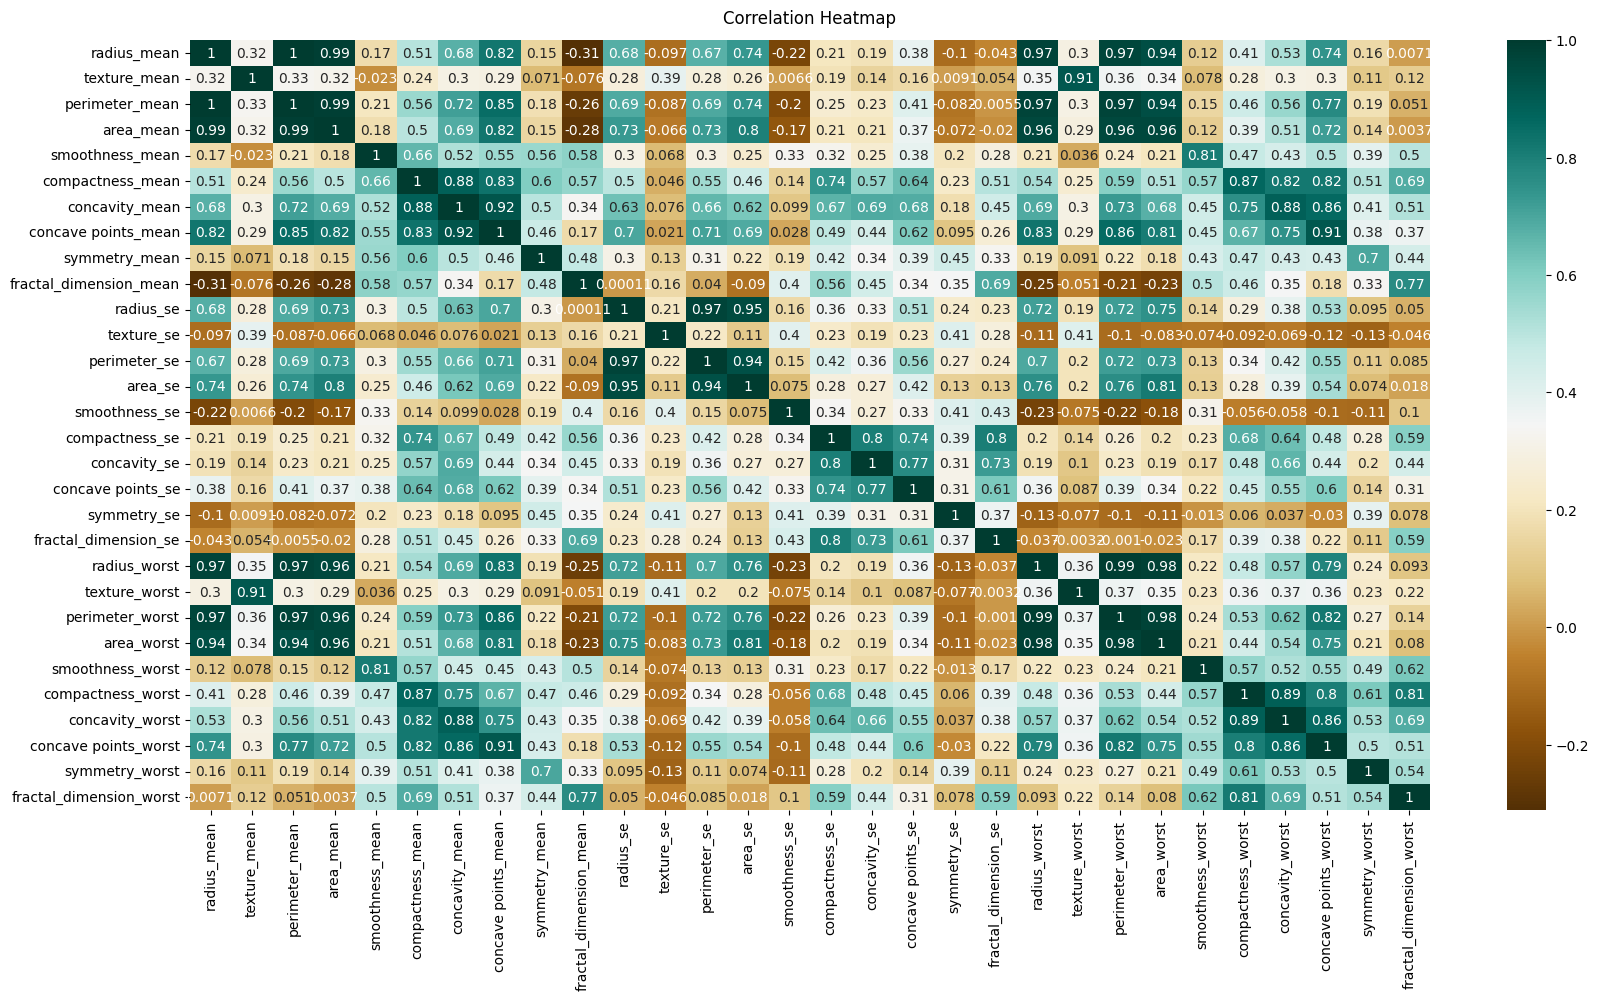

In [141]:
plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(data.iloc[:, 1:].corr(), cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap', pad=12);

## Outlier Analysis

In [142]:
def get_outliers_with_row_index(data):
  mean = np.mean(data)
  std_deviation = np.std(data)

  def z_score(value):
    return (value - mean) / std_deviation

  outliers = []
  outliers_indices = []

  for index, value in enumerate(data):
    if abs(z_score(value)) > 3:
      outliers.append(value)
      outliers_indices.append(index)

  return outliers, outliers_indices

In [143]:
def flatten(array):
  return [item for sublist in array for item in sublist]

In [144]:
indices = []

for col in data.select_dtypes(include=[np.number]).columns:
  outliers, outliers_indices = get_outliers_with_row_index(data[col].values)
  indices.append(outliers_indices)
  # print(f"Possible outliers in column '{col}': {outliers}")

flattened_list = flatten(indices)
outlier_rows = sorted(list(set(flattened_list)))
outlier_rows

[0,
 3,
 9,
 12,
 14,
 23,
 25,
 31,
 35,
 42,
 60,
 68,
 71,
 72,
 78,
 82,
 83,
 105,
 108,
 112,
 116,
 119,
 122,
 138,
 146,
 151,
 152,
 176,
 180,
 181,
 190,
 192,
 202,
 203,
 212,
 213,
 219,
 232,
 236,
 239,
 258,
 259,
 265,
 288,
 290,
 314,
 318,
 323,
 339,
 345,
 351,
 352,
 368,
 370,
 376,
 379,
 388,
 389,
 400,
 416,
 417,
 430,
 461,
 473,
 503,
 504,
 505,
 521,
 557,
 559,
 561,
 562,
 567,
 568]

In [145]:
data_without_outliers = data.drop(index=outlier_rows)
data_without_outliers.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


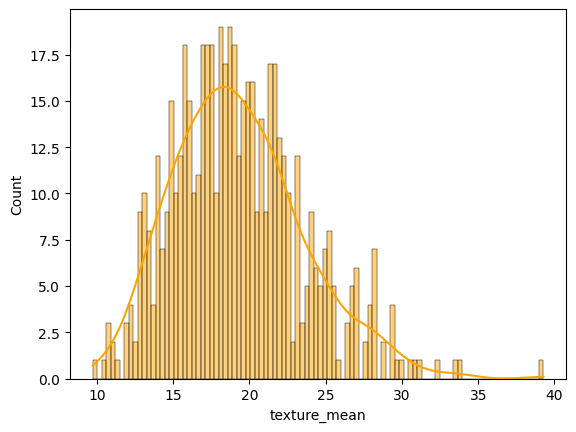

In [146]:
sb.histplot(data, x='texture_mean', bins=100, color="orange", kde=True, stat="count");

In [147]:
fig = go.Figure()
names = data.columns[5:11]
values = []
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

for column in data.iloc[:,5:11].columns:
  li = data[column].tolist()
  values.append(li)

for xd, yd, cls in zip(names, values, colors):
  fig.add_trace(go.Box(
    y=yd,
    name=xd,
    boxpoints='outliers',
    jitter=0.5,
    whiskerwidth=0.2,
    fillcolor=cls,
    marker_size=3,
    line_width=2)
  )

fig.show()

## Data Preprocessing

### Predictors & Target

Setup predictors and target

In [154]:
predictors = data.iloc[:, 1:].values
target = data.iloc[:, 0:1].values

Encode target: nominal to numerical variable

In [155]:
target = LabelEncoder().fit_transform(target.ravel())
target = target.reshape(-1, 1)
pd.DataFrame(target)

,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


Scaling Predictors

In [156]:
scaled_predictors = StandardScaler().fit_transform(predictors)
pd.DataFrame(scaled_predictors)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### Predictors without Outliers

Setup predictors and target

In [157]:
predictors_without_outliers = data_without_outliers.iloc[:, 1:].values
target_without_outliers = data_without_outliers.iloc[:, 0:1].values
predictors_without_outliers

array([[2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       [2.029e+01, 1.434e+01, 1.351e+02, ..., 1.625e-01, 2.364e-01,
        7.678e-02],
       ...,
       [2.156e+01, 2.239e+01, 1.420e+02, ..., 2.216e-01, 2.060e-01,
        7.115e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02]])

Encode target: nominal to numerical variable

In [158]:
target_without_outliers = LabelEncoder().fit_transform(target_without_outliers.ravel())
target_without_outliers = target_without_outliers.reshape(-1, 1)
pd.DataFrame(target_without_outliers)

,0
0,1
1,1
2,1
3,1
4,1
...,...
490,0
491,1
492,1
493,1


Scaling Predictors

In [159]:
scaled_predictors_without_outliers = StandardScaler().fit_transform(predictors_without_outliers)
pd.DataFrame(scaled_predictors_without_outliers)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.204465,-0.282612,2.068351,2.454131,-0.806833,-0.392414,0.206957,0.826142,0.154835,-0.922288,...,2.215670,-0.307819,1.938870,2.509421,-0.333961,-0.355468,0.004135,1.365129,-0.177083,0.524615
1,1.914972,0.595678,1.928754,2.024982,1.134031,1.588118,1.999878,2.601498,1.260931,-0.323008,...,1.871562,0.066720,1.716129,1.963460,0.644786,1.540072,1.226375,2.345448,1.561970,0.424590
2,2.112354,-1.148284,2.174252,2.352950,0.407963,0.927616,2.009614,1.875733,0.141923,-0.532395,...,1.621963,-1.498573,1.705522,1.667270,0.312202,-0.208860,0.931351,0.960963,-0.954921,-0.325600
3,-0.466770,-0.805044,-0.354381,-0.507699,2.554936,1.834284,1.357347,1.155812,1.338400,2.590363,...,-0.091304,-0.247752,-0.019839,-0.174851,2.293453,2.340040,1.724519,1.160466,2.311596,2.982183
4,1.441255,0.275153,1.428130,1.456271,-0.034703,0.347544,0.625576,0.943925,0.077365,-0.786909,...,1.704355,0.443027,1.740878,1.735792,0.635284,0.210246,0.804913,1.488959,0.453651,0.153688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.059582,2.084735,0.069705,-0.077503,0.329111,0.435286,-0.479058,-0.008180,-1.028730,-0.012537,...,-0.132500,1.416477,-0.132977,-0.251993,-0.319708,-0.038349,-0.633912,-0.031395,-1.184645,0.121041
491,2.319605,1.564827,2.554534,2.527401,1.157452,3.140665,3.946942,3.201176,1.605240,1.265447,...,2.046039,0.752199,2.656592,2.206600,0.468992,1.493062,2.452712,2.538072,0.183625,1.199092
492,2.530145,0.883394,2.506397,2.987952,1.243331,0.515716,2.754365,2.939778,-0.215298,-1.001711,...,2.327141,0.220423,2.196967,2.666357,0.483245,-0.158663,0.993985,1.977398,-1.567518,-0.716672
493,2.059719,2.362355,1.986518,2.227345,0.212784,0.211056,1.133435,1.679223,-0.103397,-1.164167,...,1.900642,2.313958,1.804519,2.012088,-0.676048,-0.310848,0.471840,0.966122,-0.535775,-1.048700


## Helper Functions

Constants

In [84]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)
malignant = 1

Model Prediction: Non-PCA predictors

In [160]:
def make_prediction(model, cv_model, predictors, target):
  x_training, x_test, y_training, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
  model.fit(x_training, y_training)

  training_prediction = model.predict(x_training)
  training_accuracy = accuracy_score(y_training, training_prediction)
  print("Training Accuracy: %.2f%%" % (training_accuracy * 100.0))

  test_prediction = model.predict(x_test)
  test_accuracy = accuracy_score(y_test, test_prediction)
  print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

  cv_prediction = cross_val_score(cv_model, predictors, target, cv = kfold)
  cv_accuracy = cv_prediction.mean()
  print("Cross validation Accuracy: %.2f%%\n" % (cv_accuracy * 100.0))

  return {
    'training': training_accuracy,
    'test': test_accuracy,
    'cv': cv_accuracy
  }

Make prediction with scaling and PCA for training-test split and cross-validation

In [88]:
def make_pca_prediction(data, metrics, split_model, cv_model, components):
  print(f"==== Components N: {components} ====")

  x_training, x_test, y_training, y_test = data
  scaler = StandardScaler()
  scaled_predictors_training = scaler.fit_transform(x_training)
  scaled_predictors_test = scaler.transform(x_test)

  pca = PCA(n_components=components)
  x_pca_training = pca.fit_transform(scaled_predictors_training)
  x_pca_test = pca.transform(scaled_predictors_test)

  split_model.fit(x_pca_training, y_training.ravel());

  training_prediction = split_model.predict(x_pca_training)
  training_score = accuracy_score(y_training, training_prediction)
  print("Training Accuracy: %.2f%%" % (training_score * 100.0))

  report = classification_report(y_training, training_prediction, output_dict=True)
  metrics['training']['accuracy'].append(report['accuracy'])
  metrics['training']['precision'].append(report[str(malignant)]['precision'])
  metrics['training']['recall'].append(report[str(malignant)]['recall'])

  test_prediction = split_model.predict(x_pca_test)
  test_score = accuracy_score(y_test, test_prediction)
  print("Test Accuracy: %.2f%%" % (test_score * 100.0))

  report = classification_report(y_test, test_prediction, output_dict=True)
  metrics['test']['accuracy'].append(report['accuracy'])
  metrics['test']['precision'].append(report[str(malignant)]['precision'])
  metrics['test']['recall'].append(report[str(malignant)]['recall'])

  # === PCA + Cross-Validation

  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=components)),
    ('model', cv_model)
  ])

  cv_score = cross_val_score(pipeline, predictors, target.ravel(), cv=kfold)
  cv_prediction = cross_val_predict(pipeline, predictors, target.ravel(), cv=kfold)
  print("Cross validation Accuracy: %.2f%%\n" % (cv_score.mean() * 100.0))

  report = classification_report(target.ravel(), cv_prediction, output_dict=True)
  metrics['cv']['accuracy'].append(report['accuracy'])
  metrics['cv']['precision'].append(report[str(malignant)]['precision'])
  metrics['cv']['recall'].append(report[str(malignant)]['recall'])

Build a graph based on the PCA scores (CV, test, and training scores)

In [86]:
def graph_PCA(metrics):
  fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=('# of Components in PCA versus Model Accuracy')
  )

  cv = metrics['cv']
  test = metrics['test']
  training = metrics['training']

  fig.add_trace(go.Scatter(x=list(range(1, len(cv['accuracy']) + 1)), mode='markers+lines', y=cv['accuracy'], line=dict(color='rgb(231,107,243)', width=2), name='CV score'), row=1, col=1)
  fig.add_trace(go.Scatter(x=list(range(1, len(test['accuracy']) + 1)), mode='markers+lines', y=test['accuracy'], line=dict(color='rgb(0,176,246)', width=2), name='Test score'), row=1, col=1)
  fig.add_trace(go.Scatter(x=list(range(1, len(training['accuracy']) + 1)), mode='markers+lines', y=training['accuracy'], line=dict(color='rgb(0,255,0)', width=2), name='Training score'), row=1, col=1)
  fig.update_xaxes(title_text='# of components')
  fig.update_yaxes(title_text='Accuracy', row=1, col=1)

  fig.add_trace(go.Scatter(x=list(range(1, len(cv['precision']) + 1)), mode='markers+lines', y=cv['precision'], line=dict(color='rgb(231,107,243)', width=2), name='CV score', showlegend=False), row=1, col=2)
  fig.add_trace(go.Scatter(x=list(range(1, len(test['precision']) + 1)), mode='markers+lines', y=test['precision'], line=dict(color='rgb(0,176,246)', width=2), name='Test score', showlegend=False), row=1, col=2)
  fig.add_trace(go.Scatter(x=list(range(1, len(training['precision']) + 1)), mode='markers+lines', y=training['precision'], line=dict(color='rgb(0,255,0)', width=2), name='Training score', showlegend=False), row=1, col=2)
  fig.update_xaxes(title_text='# of components')
  fig.update_yaxes(title_text='Precision', row=1, col=2)

  fig.add_trace(go.Scatter(x=list(range(1, len(cv['recall']) + 1)), mode='markers+lines', y=cv['recall'], line=dict(color='rgb(231,107,243)', width=2), name='CV score', showlegend=False), row=1, col=3)
  fig.add_trace(go.Scatter(x=list(range(1, len(test['recall']) + 1)), mode='markers+lines', y=test['recall'], line=dict(color='rgb(0,176,246)', width=2), name='Test score', showlegend=False), row=1, col=3)
  fig.add_trace(go.Scatter(x=list(range(1, len(training['recall']) + 1)), mode='markers+lines', y=training['recall'], line=dict(color='rgb(0,255,0)', width=2), name='Training score', showlegend=False), row=1, col=3)
  fig.update_xaxes(title_text='# of components')
  fig.update_yaxes(title_text='Recall', row=1, col=3)

  fig.show()

Plot Accuracy Metrics

In [87]:
def graph_accuracy(metrics, training_accuracy, test_accuracy, cv_accuracy):
  fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=('# of Components in PCA versus Model Accuracy')
  )

  cv = metrics['cv']
  test = metrics['test']
  training = metrics['training']
  length = len(cv['accuracy']) + 1

  fig.add_trace(go.Scatter(x=list(range(1, length)), mode='markers+lines', y=training['accuracy'], line=dict(color='rgb(0,255,0)', width=2), name='Training score'), row=1, col=1)
  fig.update_xaxes(title_text='# of components')
  fig.update_yaxes(title_text='Accuracy', row=1, col=1)

  fig.add_trace(go.Scatter(x=list(range(1, length)), mode='markers+lines', y=test['accuracy'], line=dict(color='rgb(0,176,246)', width=2), name='Test score'), row=1, col=2)
  fig.update_xaxes(title_text='# of components')
  fig.update_yaxes(title_text='Accuracy', row=1, col=2)

  fig.add_trace(go.Scatter(x=list(range(1, length)), mode='markers+lines', y=cv['accuracy'], line=dict(color='rgb(231,107,243)', width=2), name='CV score'), row=1, col=3)
  fig.update_xaxes(title_text='# of components')
  fig.update_yaxes(title_text='Accuracy', row=1, col=3)

  fig.add_trace(
    go.Scatter(
      x=[0, length],
      y=[training_accuracy, training_accuracy],
      mode='lines',
      line=dict(
        color="RoyalBlue",
        width=3,
        dash="dash"
      ),
      name='Training Accuracy'
    ),
    row=1,
    col=1
  )

  fig.add_trace(
    go.Scatter(
      x=[0, length],
      y=[test_accuracy, test_accuracy],
      mode='lines',
      line=dict(
        color="Red",
        width=3,
        dash="dash"
      ),
      name='Test Accuracy'
    ),
    row=1,
    col=2
  )

  fig.add_trace(
    go.Scatter(
      x=[0, length],
      y=[cv_accuracy, cv_accuracy],
      mode='lines',
      line=dict(
        color="Yellow",
        width=3,
        dash="dash"
      ),
      name='CV Accuracy'
    ),
    row=1,
    col=3
  )

  fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=0.16,
            y=1.05,
            xref="paper",
            yref="paper",
            text="Training Scores Comparison",
            showarrow=False,
            font=dict(size=14)
        ),
        go.layout.Annotation(
            x=0.5,
            y=1.05,
            xref="paper",
            yref="paper",
            text="Test Scores Comparison",
            showarrow=False,
            font=dict(size=14)
        ),
        go.layout.Annotation(
            x=0.85,
            y=1.05,
            xref="paper",
            yref="paper",
            text="CV Scores Comparison",
            showarrow=False,
            font=dict(size=14)
        )
    ]
)

  fig.show()

Functions to initialize metrics variables in a hash table

In [89]:
def init_metric():
  return {
    'accuracy': [],
    'precision': [],
    'recall': []
  }

def init_metrics():
  return {
    'training': init_metric(),
    'test': init_metric(),
    'cv': init_metric()
  }

Function to split the data for training and test

In [90]:
def split_data():
  return train_test_split(
    predictors,
    target,
    test_size = 0.3,
    random_state = 0
  )

## Naive Bayes

### Prediction Model

In [197]:
predictors_scores = make_prediction(
  GaussianNB(),
  GaussianNB(),
  predictors,
  target
)

predictors_scores

Training Accuracy: 94.22%
Test Accuracy: 92.40%
Cross validation Accuracy: 93.82%



{'training': 0.9422110552763819,
 'test': 0.9239766081871345,
 'cv': 0.9382066276803117}

### Prediction Model w/o Outliers

In [163]:
predictors_scores = make_prediction(
  GaussianNB(),
  GaussianNB(),
  predictors_without_outliers,
  target_without_outliers.ravel()
)

Training Accuracy: 94.80%
Test Accuracy: 93.96%
Cross validation Accuracy: 94.51%



### Prediction with PCA

In [189]:
metrics = init_metrics()
data = split_data()

for components in range(1, 15):
  make_pca_prediction(data, metrics, GaussianNB(), GaussianNB(), components)

==== Components N: 1 ====
Training Accuracy: 91.96%
Test Accuracy: 89.47%
Cross validation Accuracy: 91.19%

==== Components N: 2 ====
Training Accuracy: 91.96%
Test Accuracy: 89.47%
Cross validation Accuracy: 91.19%

==== Components N: 3 ====
Training Accuracy: 91.71%
Test Accuracy: 89.47%
Cross validation Accuracy: 91.73%

==== Components N: 4 ====
Training Accuracy: 91.96%
Test Accuracy: 89.47%
Cross validation Accuracy: 91.90%

==== Components N: 5 ====
Training Accuracy: 92.46%
Test Accuracy: 91.23%
Cross validation Accuracy: 92.60%

==== Components N: 6 ====
Training Accuracy: 93.22%
Test Accuracy: 91.81%
Cross validation Accuracy: 93.13%

==== Components N: 7 ====
Training Accuracy: 93.47%
Test Accuracy: 90.64%
Cross validation Accuracy: 92.08%

==== Components N: 8 ====
Training Accuracy: 93.47%
Test Accuracy: 90.64%
Cross validation Accuracy: 91.55%

==== Components N: 9 ====
Training Accuracy: 93.22%
Test Accuracy: 90.64%
Cross validation Accuracy: 91.02%

==== Components N: 

### Performance Analysis

In [190]:
graph_PCA(metrics)

In [199]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## Logistic Regression

### Prediction Model

In [174]:
predictors_scores = make_prediction(
  LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1, solver="lbfgs"),
  LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1, solver="lbfgs"),
  predictors,
  target.ravel()
)

predictors_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy: 95.48%
Test Accuracy: 96.49%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross validation Accuracy: 95.23%



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'training': 0.9547738693467337,
 'test': 0.9649122807017544,
 'cv': 0.9523391812865495}

### Grid Search: hyperparameters tuning

In [203]:
param_grid = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'max_iter': [100, 200, 300, 400, 500, 600],
  'penalty': ['l1', 'l2'],  # Note: 'l1' only for 'liblinear' solver
  'tol': [1e-4, 1e-3, 1e-2, 1e-1],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

logistic = LogisticRegression(random_state=1)

grid_search = GridSearchCV(
  estimator=logistic,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  verbose=1,
  n_jobs=-1
)

x_training, x_test, y_training, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

grid_search.fit(x_training, y_training)

best_params = grid_search.best_params_
# Before it was: {C=1, max_iter=600, penalty="l2", solver="lbfgs", tol=0.0001}
# With GridSearchCV: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
best_params

logistic_regression = LogisticRegression(C=10, max_iter=100, penalty='l1', solver='liblinear', tol=0.01)
logistic_regression.fit(x_training, y_training);

training_prediction = logistic_regression.predict(x_training)
print("Training Accuracy: %.2f%%" % (accuracy_score(y_training, training_prediction) * 100.0))

logistic_regression_prediction = logistic_regression.predict(x_test)
print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, logistic_regression_prediction) * 100.0))

logistic_regression = LogisticRegression(C=10, max_iter=100, penalty='l1', solver='liblinear', tol=0.01)
prediction = cross_val_score(logistic_regression, predictors, target, cv=kfold)
print("Cross validation Accuracy: %.2f%%\n" % (prediction.mean() * 100.0))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

Training Accuracy: 97.99%
Test Accuracy: 96.49%
Cross validation Accuracy: 96.46%



### Prediction Model w/o Outliers

In [173]:
predictors_scores = make_prediction(
  LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1, solver="lbfgs"),
  LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1, solver="lbfgs"),
  predictors_without_outliers,
  target_without_outliers.ravel()
)

predictors_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy: 95.95%
Test Accuracy: 93.96%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross validation Accuracy: 94.69%



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'training': 0.9595375722543352,
 'test': 0.9395973154362416,
 'cv': 0.946936274509804}

### Prediction with PCA

In [204]:
metrics = init_metrics()
data = split_data()

for components in range(2, 15):
  make_pca_prediction(
    data,
    metrics,
    LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1, solver="lbfgs"),
    LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1, solver="lbfgs"),
    components
  )

==== Components N: 2 ====
Training Accuracy: 96.23%
Test Accuracy: 93.57%
Cross validation Accuracy: 94.71%

==== Components N: 3 ====
Training Accuracy: 96.48%
Test Accuracy: 93.57%
Cross validation Accuracy: 94.89%

==== Components N: 4 ====
Training Accuracy: 96.98%
Test Accuracy: 97.08%
Cross validation Accuracy: 96.65%

==== Components N: 5 ====
Training Accuracy: 98.24%
Test Accuracy: 97.08%
Cross validation Accuracy: 97.35%

==== Components N: 6 ====
Training Accuracy: 98.49%
Test Accuracy: 97.08%
Cross validation Accuracy: 97.35%

==== Components N: 7 ====
Training Accuracy: 98.24%
Test Accuracy: 96.49%
Cross validation Accuracy: 97.35%

==== Components N: 8 ====
Training Accuracy: 97.99%
Test Accuracy: 95.91%
Cross validation Accuracy: 97.71%

==== Components N: 9 ====
Training Accuracy: 98.24%
Test Accuracy: 96.49%
Cross validation Accuracy: 97.88%

==== Components N: 10 ====
Training Accuracy: 98.74%
Test Accuracy: 95.91%
Cross validation Accuracy: 97.70%

==== Components N:

### Performance Analysis

In [205]:
graph_PCA(metrics)

In [206]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## SVM

### Prediction Model

In [177]:
predictors_scores = make_prediction(
  SVC(kernel='rbf', random_state=1, C = 2),
  SVC(kernel='rbf', random_state=1, C = 2),
  predictors,
  target.ravel()
)

Training Accuracy: 90.95%
Test Accuracy: 94.74%
Cross validation Accuracy: 91.72%



### Prediction Model w/o Outliers

In [175]:
predictors_scores = make_prediction(
  SVC(kernel='rbf', random_state=1, C = 2),
  SVC(kernel='rbf', random_state=1, C = 2),
  predictors_without_outliers,
  target_without_outliers.ravel()
)

Training Accuracy: 93.06%
Test Accuracy: 92.62%
Cross validation Accuracy: 92.44%



### Prediction with PCA

In [210]:
metrics = init_metrics()
data = split_data()

for components in range(2, 15):
  make_pca_prediction(
    data,
    metrics,
    SVC(kernel='rbf', random_state=1, C = 2),
    SVC(kernel='rbf', random_state=1, C = 2),
    components
  )

==== Components N: 2 ====
Training Accuracy: 95.73%
Test Accuracy: 90.06%
Cross validation Accuracy: 93.47%

==== Components N: 3 ====
Training Accuracy: 95.48%
Test Accuracy: 91.23%
Cross validation Accuracy: 94.00%

==== Components N: 4 ====
Training Accuracy: 97.99%
Test Accuracy: 94.15%
Cross validation Accuracy: 95.58%

==== Components N: 5 ====
Training Accuracy: 97.99%
Test Accuracy: 96.49%
Cross validation Accuracy: 96.30%

==== Components N: 6 ====
Training Accuracy: 97.99%
Test Accuracy: 96.49%
Cross validation Accuracy: 97.17%

==== Components N: 7 ====
Training Accuracy: 98.24%
Test Accuracy: 97.08%
Cross validation Accuracy: 97.17%

==== Components N: 8 ====
Training Accuracy: 98.24%
Test Accuracy: 97.08%
Cross validation Accuracy: 97.35%

==== Components N: 9 ====
Training Accuracy: 98.49%
Test Accuracy: 98.83%
Cross validation Accuracy: 97.17%

==== Components N: 10 ====
Training Accuracy: 98.74%
Test Accuracy: 98.83%
Cross validation Accuracy: 97.52%

==== Components N:

### Performance Analysis

In [212]:
graph_PCA(metrics)

In [213]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## KNN

### Prediction Model

In [166]:
predictors_scores = make_prediction(
  KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1),
  KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1),
  predictors,
  target.ravel()
)

Training Accuracy: 94.97%
Test Accuracy: 96.49%
Cross validation Accuracy: 93.13%



### Grid Search: hyperparameters tuning

In [215]:
param_grid = {
  'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'leaf_size': [10, 20, 30, 40, 50]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
  estimator=knn,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  verbose=1,
  n_jobs=-1
)

x_training, x_test, y_training, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

grid_search.fit(x_training, y_training)

model = grid_search.best_estimator_
model.fit(x_training, y_training)

training_prediction = model.predict(x_training)
print("Training Accuracy: %.2f%%" % (accuracy_score(y_training, training_prediction) * 100.0))

knn_prediction = model.predict(x_test)
print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, knn_prediction) * 100.0))

prediction = cross_val_score(model, predictors, target, cv = kfold)
print("Cross validation Accuracy: %.2f%%\n" % (prediction.mean() * 100.0))

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
Training Accuracy: 95.73%
Test Accuracy: 94.15%
Cross validation Accuracy: 93.67%



### Prediction Model w/o Outliers

In [167]:
predictors_scores = make_prediction(
  KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1),
  KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1),
  predictors_without_outliers,
  target_without_outliers.ravel()
)

Training Accuracy: 95.38%
Test Accuracy: 93.96%
Cross validation Accuracy: 94.26%



### Prediction with PCA

In [216]:
metrics = init_metrics()
data = split_data()

for components in range(2, 15):
  make_pca_prediction(
    data,
    metrics,
    KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1),
    KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1),
    components
  )

==== Components N: 2 ====
Training Accuracy: 95.73%
Test Accuracy: 91.81%
Cross validation Accuracy: 93.83%

==== Components N: 3 ====
Training Accuracy: 95.73%
Test Accuracy: 91.81%
Cross validation Accuracy: 94.01%

==== Components N: 4 ====
Training Accuracy: 96.98%
Test Accuracy: 94.15%
Cross validation Accuracy: 95.24%

==== Components N: 5 ====
Training Accuracy: 96.73%
Test Accuracy: 94.74%
Cross validation Accuracy: 95.42%

==== Components N: 6 ====
Training Accuracy: 96.98%
Test Accuracy: 94.74%
Cross validation Accuracy: 95.59%

==== Components N: 7 ====
Training Accuracy: 97.74%
Test Accuracy: 95.32%
Cross validation Accuracy: 96.30%

==== Components N: 8 ====
Training Accuracy: 97.74%
Test Accuracy: 95.91%
Cross validation Accuracy: 96.65%

==== Components N: 9 ====
Training Accuracy: 97.99%
Test Accuracy: 95.91%
Cross validation Accuracy: 96.82%

==== Components N: 10 ====
Training Accuracy: 97.74%
Test Accuracy: 95.32%
Cross validation Accuracy: 96.82%

==== Components N:

### Performance Analysis

In [217]:
graph_PCA(metrics)

In [218]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## Decision Tree

### Prediction Model

In [178]:
predictors_scores = make_prediction(
  DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3),
  DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3),
  predictors,
  target
)

Training Accuracy: 96.48%
Test Accuracy: 95.32%
Cross validation Accuracy: 93.67%



### Grid Search: hyperparameters tuning

In [220]:
param_grid = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 3, 5, 7, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}

decision_tree = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(
  estimator=decision_tree,
  param_grid=param_grid,
  scoring='accuracy',
  cv=10,
  verbose=1,
  n_jobs=-1
)

x_training, x_test, y_training, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

grid_search.fit(x_training, y_training)

model = grid_search.best_estimator_
model.fit(x_training, y_training)

training_prediction = model.predict(x_training)
print("Training Accuracy: %.2f%%" % (accuracy_score(y_training, training_prediction) * 100.0))

knn_prediction = model.predict(x_test)
print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, knn_prediction) * 100.0))

prediction = cross_val_score(model, predictors, target, cv = kfold)
print("Cross validation Accuracy: %.2f%%\n" % (prediction.mean() * 100.0))

Fitting 10 folds for each of 450 candidates, totalling 4500 fits
Training Accuracy: 98.49%
Test Accuracy: 91.81%
Cross validation Accuracy: 94.72%



### Prediction Model w/o Outliers

In [179]:
predictors_scores = make_prediction(
  DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3),
  DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3),
  predictors_without_outliers,
  target_without_outliers
)

Training Accuracy: 97.69%
Test Accuracy: 92.62%
Cross validation Accuracy: 94.09%



### Prediction with PCA

In [221]:
metrics = init_metrics()
data = split_data()

for components in range(2, 15):
  make_pca_prediction(
    data,
    metrics,
    DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3),
    DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3),
    components
  )

==== Components N: 2 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.18%

==== Components N: 3 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.18%

==== Components N: 4 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.18%

==== Components N: 5 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.18%

==== Components N: 6 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.18%

==== Components N: 7 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.18%

==== Components N: 8 ====
Training Accuracy: 95.23%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.01%

==== Components N: 9 ====
Training Accuracy: 96.23%
Test Accuracy: 91.23%
Cross validation Accuracy: 94.18%

==== Components N: 10 ====
Training Accuracy: 96.23%
Test Accuracy: 91.23%
Cross validation Accuracy: 94.18%

==== Components N:

### Performance Analysis

In [222]:
graph_PCA(metrics)

In [223]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## Random Forest

### Prediction Model

In [181]:
predictors_scores = make_prediction(
  RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4),
  RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4),
  predictors,
  target.ravel()
)

Training Accuracy: 98.99%
Test Accuracy: 96.49%
Cross validation Accuracy: 95.76%



### Grid Search: hyperparameters tuning

In [236]:
param_grid = {
  'n_estimators': [100, 200, 300, 500],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['auto', 'sqrt', 'log2'],
  'bootstrap': [True, False]
}

random_forest = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

grid_search = GridSearchCV(
  estimator=random_forest,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  verbose=1,
  n_jobs=-1
)

x_training, x_test, y_training, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

grid_search.fit(x_training, y_training)

model = grid_search.best_estimator_
model.fit(x_training, y_training)

training_prediction = model.predict(x_training)
print("Training Accuracy: %.2f%%" % (accuracy_score(y_training, training_prediction) * 100.0))

knn_prediction = model.predict(x_test)
print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, knn_prediction) * 100.0))

prediction = cross_val_score(model, predictors, target, cv = kfold)
print("Cross validation Accuracy: %.2f%%\n" % (prediction.mean() * 100.0))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
622 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Training Accuracy: 100.00%
Test Accuracy: 95.32%
Cross validation Accuracy: 96.12%



### Prediction Model w/o Outliers

In [183]:
predictors_scores = make_prediction(
  RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4),
  RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4),
  predictors_without_outliers,
  target_without_outliers.ravel()
)

Training Accuracy: 99.13%
Test Accuracy: 95.30%
Cross validation Accuracy: 96.13%



### Prediction with PCA

In [237]:
metrics = init_metrics()
data = split_data()

for components in range(2, 15):
  make_pca_prediction(
    data,
    metrics,
    RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4),
    RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4),
    components
  )

==== Components N: 2 ====
Training Accuracy: 96.23%
Test Accuracy: 90.06%
Cross validation Accuracy: 94.18%

==== Components N: 3 ====
Training Accuracy: 97.49%
Test Accuracy: 90.06%
Cross validation Accuracy: 92.95%

==== Components N: 4 ====
Training Accuracy: 97.74%
Test Accuracy: 88.89%
Cross validation Accuracy: 94.01%

==== Components N: 5 ====
Training Accuracy: 97.74%
Test Accuracy: 90.64%
Cross validation Accuracy: 95.07%

==== Components N: 6 ====
Training Accuracy: 97.74%
Test Accuracy: 92.40%
Cross validation Accuracy: 94.36%

==== Components N: 7 ====
Training Accuracy: 97.99%
Test Accuracy: 91.81%
Cross validation Accuracy: 93.66%

==== Components N: 8 ====
Training Accuracy: 97.24%
Test Accuracy: 91.23%
Cross validation Accuracy: 93.83%

==== Components N: 9 ====
Training Accuracy: 97.49%
Test Accuracy: 90.64%
Cross validation Accuracy: 93.65%

==== Components N: 10 ====
Training Accuracy: 97.74%
Test Accuracy: 90.64%
Cross validation Accuracy: 94.02%

==== Components N:

### Performance Analysis

In [238]:
graph_PCA(metrics)

In [239]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## XGBoost

### Prediction Model

In [184]:
predictors_scores = make_prediction(
  XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3),
  XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3),
  predictors,
  target
)

Training Accuracy: 100.00%
Test Accuracy: 96.49%
Cross validation Accuracy: 96.65%



### Grid Search: hyperparameters tuning

In [227]:
param_grid = {
  'learning_rate': [0.01, 0.05, 0.1],
  'max_depth': [3, 5, 7, 9],
  'n_estimators': [50, 100, 200, 500],
  'reg_lambda': [0.01, 0.1, 1],
  'reg_alpha': [0.01, 0.1],
}

x_training, x_test, y_training, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
xg = XGBClassifier(objective='binary:logistic', random_state=3)
grid_search = GridSearchCV(xg, param_grid, scoring='roc_auc', cv=4)
grid_search.fit(x_training, y_training)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=3, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 500],
                         'reg_alpha': [0.01, 0.1],
                         'reg_lambda': [0.01, 0.1, 1]},
             scoring='roc_auc')

In [228]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318270,0.226205,0.012694,0.007012,0.01,3,50,0.01,0.01,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.976190,0.984932,0.962075,0.956626,0.969956,0.011213,287
1,0.334797,0.155722,0.011585,0.003707,0.01,3,50,0.01,0.1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.975761,0.984932,0.962075,0.957062,0.969958,0.011027,286
2,0.402388,0.426164,0.008567,0.006771,0.01,3,50,0.01,1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.975547,0.987479,0.962729,0.959895,0.971412,0.010992,281


In [229]:
best_model = grid_search.best_estimator_
prediction = best_model.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9649122807017544


In [230]:
best_model = grid_search.best_estimator_
prediction = best_model.predict(x_training)

accuracy = accuracy_score(y_training, prediction)
print("Training Accuracy:", accuracy)

Training Accuracy: 1.0


### Prediction Model w/o Outliers

In [185]:
predictors_scores = make_prediction(
  XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3),
  XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3),
  predictors_without_outliers,
  target_without_outliers
)

Training Accuracy: 100.00%
Test Accuracy: 93.29%
Cross validation Accuracy: 96.53%



### Prediction with PCA

In [232]:
metrics = init_metrics()
data = split_data()

for components in range(2, 15):
  make_pca_prediction(
    data,
    metrics,
    XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3),
    XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3),
    components
  )

==== Components N: 2 ====
Training Accuracy: 97.24%
Test Accuracy: 93.57%
Cross validation Accuracy: 93.83%

==== Components N: 3 ====
Training Accuracy: 98.24%
Test Accuracy: 93.57%
Cross validation Accuracy: 94.01%

==== Components N: 4 ====
Training Accuracy: 99.50%
Test Accuracy: 92.98%
Cross validation Accuracy: 94.18%

==== Components N: 5 ====
Training Accuracy: 99.50%
Test Accuracy: 95.32%
Cross validation Accuracy: 96.46%

==== Components N: 6 ====
Training Accuracy: 99.50%
Test Accuracy: 95.91%
Cross validation Accuracy: 95.94%

==== Components N: 7 ====
Training Accuracy: 99.50%
Test Accuracy: 95.32%
Cross validation Accuracy: 95.94%

==== Components N: 8 ====
Training Accuracy: 99.50%
Test Accuracy: 95.91%
Cross validation Accuracy: 96.11%

==== Components N: 9 ====
Training Accuracy: 99.50%
Test Accuracy: 95.91%
Cross validation Accuracy: 96.64%

==== Components N: 10 ====
Training Accuracy: 99.50%
Test Accuracy: 95.32%
Cross validation Accuracy: 96.46%

==== Components N:

### Performance Analysis

Comparison of Training, Test, and Cross-Validation scores for:

- Accuracy
- Precision
- Recall

In [233]:
graph_PCA(metrics)

Comparison of accuracy scores between with PCA vs without PCA

- Dashed line: without PCA (fixed score)
- Line: Variation with the increase of # of components

Graphs:

1. Comparison between training scores
2. Comparison between test scores
3. Comparison between CV scores

In [234]:
graph_accuracy(metrics, predictors_scores['training'], predictors_scores['test'], predictors_scores['cv'])

## Model Analysis & Comparison

### Naive Bayes

- Training Accuracy: 94.22%
- Test Accuracy: 91.23%
- Cross validation Accuracy: 93.47%

### SVM

- Training Accuracy: 98.49%
- Test Accuracy: 97.66%
- Cross validation Accuracy: 97.88%

### Logistic Regression

- Training Accuracy: 98.99%
- Test Accuracy: 97.66%
- Cross validation Accuracy: 98.06%

### KNN

- Training Accuracy: 97.99%
- Test Accuracy: 97.08%
- Cross validation Accuracy: 97.17%

### Decision Tree

- Training Accuracy: 96.48%
- Test Accuracy: 95.32%
- Cross validation Accuracy: 93.67%

### Random Forest

- Training Accuracy: 98.99%
- Test Accuracy: 96.49%
- Cross validation Accuracy: 95.76%

### XGBoost

- Training Accuracy: 100.00%
- Test Accuracy: 96.49%
- Cross validation Accuracy: 96.65%

## Performance Knowledge

### Insights

- **High Test Accuracy with Stable Cross-Validation**: Indicates good generalization.
- **Stable Cross-Validation Accuracy**: Means your model’s performance is reliable across different subsets of data, further supporting the choice of a model configuration that maximizes test accuracy.
- **PCA bahevior**: initial increase in accuracy as the initial components capture the most variance in the data, which usually contains the most important information with plateau or decrease in accuracy
- **Worse Accuracy for more PCA components**: As you increase the number of components in PCA, you start including components that explain less variance in the data. These components may capture noise or irrelevant patterns, which can confuse the model, leading to a decrease in accuracy.

### Confusion Matrix & Metrics

A confusion matrix is a table that categorizes predictions according to whether they match the actual value

Data Classification:

- True Positive (TP): Malignant tumour correctly classified as Malignant
- True Negative (TN): Benign tumour correctly classified as benign
- False Positive (FP): Benign tumour incorrectly classified as malignant
- False Negative (FN): Malignant tumour incorrectly classified as benign
Metrics

Performance Metrics Definition:

- Accuracy (called the success rate): (TP + TN) / (TP + TN + FP + FN)
- Specificity (also called the true negative rate): TN / (TN + FP)
- Precision (also called the positive predictive value): TP / (TP + FP)
- Recall: (also called the true positive rate): TP / (TP + FN)
- F1 Score: 2 * Precision * Recall / (Recall + Precision) = 2TP / (2TP + FP+FN)

### **Analysis**

- **Overfitting**: The 100% training accuracy suggests that the model has perfectly learned the training data. However, the 96.49% test accuracy indicates that it might not generalize as well to new, unseen data. This difference suggests potential overfitting, where the model performs exceptionally well on the training data but slightly less well on new data.

- **Cross-validation**: The cross-validation accuracy of 96.65% is close to the test accuracy and provides a more robust estimate of the model's generalization performance. It suggests that the model's performance is consistent across different subsets of the data, which is a good sign.

### PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. PCA is a very flexible tool and allows analysis of datasets that may contain, for example, multicollinearity, missing values, categorical data, and imprecise measurements. The goal is to extract the important information from the data and to express this information as a set of summary indices called principal components. So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.